# Are food deserts in King County, WA very different from the rest of King County?

### We'll cross reference some demographic and fruit/vegetable consumption data from behavioral health surveys conducted by the [Center for Health Statistics](https://www.doh.wa.gov/DataandStatisticalReports/DataSystems/BehavioralRiskFactorSurveillanceSystemBRFSS), a Division of Disease Control and Health Statistics at the Washington State Department of Health, with information on food deserts from the USDA.

### Food desert designations by the USDA can be found at the [Food Access Research Atlas](https://www.ers.usda.gov/data-products/food-access-research-atlas).

### Food deserts are defined as areas of [low income and low access](https://www.ers.usda.gov/webdocs/publications/93141/eib%20209%20summary.pdf?v=6737.3) and a few designations exist based on the density of the population.

### King County is largly urban and all of our data pertains the low income and 1 mile from nearest grocery store designation.

As the survey file is over 200mbs, I've done the cleaning and organizing of the data we need elsewhere. You can see the process [here](https://github.com/llpk79/Project_Blog_Post/blob/master/main.py).

### The data we need is partially listed below. Each column represents answers of one household survey. Each survey is a row.

In [267]:
%matplotlib inline

# Run script to clean and organize out data into Pandas dataframes.
%run -i main.py

# We are interested in the dataframe with info from 2015.
df15

         Year    Age   Race   Income  Over Median Income  Adults  Children  \
51336  2015.0  25-29  White     $75+                True     2.0       0.0   
51337  2015.0  18-24  Black  $25-35K               False     1.0       3.0   
51338  2015.0  18-24  Black  $25-35K               False     1.0       1.0   
51339  2015.0  18-24  White  $35-50K               False     2.0       0.0   
51340  2015.0  45-49  White     $75+                True     3.0       1.0   

       Household Size  Zip-code  In Food Desert  Unemployed  Active  \
51336             2.0   98908.0           False       False   False   
51337             4.0   98208.0           False       False   False   
51338             2.0   98433.0           False       False   False   
51339             2.0   98122.0           False       False   False   
51340             4.0   98686.0           False       False   False   

      Overweight Pre-Diabetic Diabetic  Good-health  No Veg  No Fruit  \
51336      False        False  

<Figure size 432x288 with 0 Axes>

##### The USDA food desert data is from 2015, so we'll just look at survey data from that year. We have 11,466 surveys to look through. We also have several columns we won't get to right now, but we have time take a look at a few that are typically looked at as indicators of inequality.

In [268]:
# Check number of rows(survey responses) and columns(survey questions).
df15.shape

(11466, 24)

### We'll look at the differences between all of King County and just those living in food desert areas.

In [ ]:
# Separate out data with food desert residents.
in_desert = df15[df15['In Food Desert'] == 1]

## Let's examine the racial composition of food deserts in the county.

In [286]:
# Use our food desert resident dataframe and do a count.
race_des = in_desert['Race'].value_counts()

race_des_vals = race_des.values
race_des_names = race_des.index
# Calculate the percentage each race makes up.
race_des_pct = [(val / sum(race_des_vals)) * 100 for val in race_des_vals]

# Do plotting things.
fig = plt.figure(figsize=(10, 6), dpi=1200)
ax = fig.gca()
x = list(range(len(race_des_vals)))
sns.barplot(x=x, y=race_des_pct)
for x, name, value in zip(x, race_des_names, race_des_pct):
    plt.text(x=x, y=10, s=f'{name}\n{value:.1f}%', ha='center', fontsize=12)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
ax.set_yticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '%'])
ax.set_xticks([])
plt.text(0, -5, s=r'AIAN = American Indian or Alaska Native. NHOPI = Native Hawaiian or Pacific Islander',
         fontsize=10,
         ha='left')
plt.title('Racial Composition Of Respondents In Food Deserts, 2015', fontsize=16, pad=10)
plt.savefig('plots/race_des.jpg', dpi=1200, optimize=True, quality=95)
;

''

### That may be surprising if you weren't aware that Seattle is in King County and that Seattle is one of the whitest places around.

In [288]:
# Do counts on whole dataset.
race_total = df15['Race'].value_counts()

race_total_vals = race_total.values
race_total_names = race_total.index
# Same as above, calculate percentages.
race_total_pct = [(val / sum(race_total_vals)) * 100 for val in race_total_vals]

# Same plotty things.
fig = plt.figure(figsize=(10, 6), dpi=1200)
ax = fig.gca()
x = list(range(len(race_total_vals)))
sns.barplot(x=x, y=race_total_pct)
for x, name, value in zip(x, race_total_names, race_total_pct):
    plt.text(x=x, y=10, s=f'{name}\n{value:.1f}%', ha='center', fontsize=12)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
ax.set_yticklabels(['0', '10', '20', '30', '40', '50', '60', '70', '80', '%'])
ax.set_xticks([])
plt.text(0, -5, s=r'AIAN = American Indian or Alaska Native. NHOPI = Native Hawaiian or Pacific Islander',
         fontsize=10,
         ha='left')
plt.title('Racial Composition Of All Respondents, 2015', fontsize=16, pad=10)
plt.savefig('plots/race_total.jpg', dpi=1200, optimize=True, quality=95)
;

''

### Told you so.

### Okay, so those look pretty much the same. Are they? Let's do some math and check with an individual t-test.

In [281]:
ttest(race_total_pct, race_des_pct)

Ttest_indResult(statistic=1.2494566423930824e-16, pvalue=0.9999999999999999)

### If they were very different that `pvalue` would be less than 0.01, but its almost 100 times that. Meaning the makeup of King County as a whole is not significantly different from the makeup of food deserts in King County. They look pretty much the same because they are pretty much the same.

## Alright, so what about income? Are food deserts mostly made of lower income earners?

In [289]:
# First look at those in food deserts.
des_income = in_desert['Income'].value_counts()

des_income_vals = des_income.values
des_income_names = list(reversed(des_income.index))
# Again we find percentages for each category.
des_income_pct = [(val / sum(des_income_vals)) * 100 for val in reversed(des_income_vals)]
# 'Don't know' and 'Refused' are in the middle of our data and it looks bad on the chart. Put them at the end. 
des_middle_names = des_income_names[4:6]
des_income_names = des_income_names[:4] + des_income_names[6:] + des_middle_names
# Do the same with the category names.
des_middle_pct = des_income_pct[4:6]
des_income_pct = des_income_pct[:4] + des_income_pct[6:] + des_middle_pct

# Do the plot stuff.
fig = plt.figure(figsize=(13, 6), dpi=1200)
ax = fig.gca()
x = list(range(0, 10))
sns.barplot(x=x, y=des_income_pct)
ax.set_xticks([])
ax.set_ylim(0, 40)
ax.set_yticks([10, 20, 30, 40, 45])
ax.set_yticklabels(['10', '20', '30', '40', '%'], fontsize=12)
ax.set_ylabel('Of King County Food Desert Population', fontsize=12)
for x, pct, name in zip(x, des_income_pct, des_income_names):
    ax.text(x, 1.9, s=f'{pct:.1f}%\n\n{name}', ha='center', fontsize=13, va='top')
plt.title('Income Levels Of Respondents Residing In Food Deserts, 2015.', fontsize=16, pad=10)
plt.savefig('plots/income_des.jpg', dpi=1200, optimize=True, quality=95)
;

''

### That is also pretty surprising. Or, perhaps you haven't heard, the median income in King County in 2015 was a cool $[75k](https://www.kingcounty.gov/independent/forecasting/King%20County%20Economic%20Indicators/Household%20Income.aspx)!

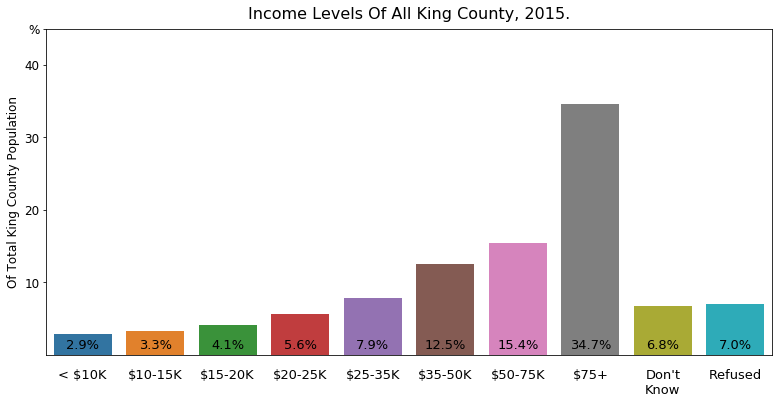

In [239]:
# Repeat as above with all data.
income = df15['Income'].value_counts()

income_vals = income.values
income_names = list(reversed(income.index))
income_pct = [(val / sum(income_vals)) * 100 for val in reversed(income_vals)]
# 'Don't know' and 'Refused' are in the middle of our data. Put them at the end. 
middle_names = income_names[4:6]
income_names = income_names[:4] + income_names[6:] + middle_names
# Do the same with the names.
middle_pct = income_per[4:6]
income_pct = income_pct[:4] + income_pct[6:] + middle_pct

# And the same things to plot.
fig = plt.figure(figsize=(13, 6), dpi=1200)
ax = fig.gca()
x = list(range(0, 10))
sns.barplot(x=x, y=income_pct)
ax.set_xticks([])
ax.set_ylim(0, 40)
ax.set_yticks([10, 20, 30, 40, 45])
ax.set_yticklabels(['10', '20', '30', '40', '%'], fontsize=12)
ax.set_ylabel('Of Total King County Population', fontsize=12)
for x, pct, name in zip(x, income_pct, income_names):
    ax.text(x, 2.2, s=f'{pct:.1f}%\n\n{name}', ha='center', fontsize=13, va='top')
plt.title('Income Levels Of All Respondents, 2015.', fontsize=16, pad=10)
plt.savefig('plots/income_total.jpg', dpi=1200, optimize=True, quality=95)
;

##### Just for a little perspective, according to MIT, the average expenses for a family of four in King County are about $[80k](http://livingwage.mit.edu/counties/53033).

### Well, these look the same, too. Are they? Let's watch the computer do math things!

In [277]:
ttest(income_pct, des_income_pct)

Ttest_indResult(statistic=-3.9930764684818095e-16, pvalue=0.9999999999999997)

### That `pvalue` is again too high to find any difference between those in and those out of food deserts. 

## We're just about out of time here, folks. Let's check out one more thing. This is where the rubber meets the road. Do people in King County food deserts eat fresh fruits and vegies less often?

In [12]:
fruits_n_veg = ['Fruit Daily', 'Veg Daily', 'Fruit Weekly',
                'Veg Weekly', 'Fruit Monthly', 'Veg Monthly']

# make a dataframe comparing food desert status to each of our consumption categories above.
df15_consumption = df15.melt(id_vars='In Food Desert',
                             value_vars=fruits_n_veg,
                             value_name='Proportion reporting eating...')

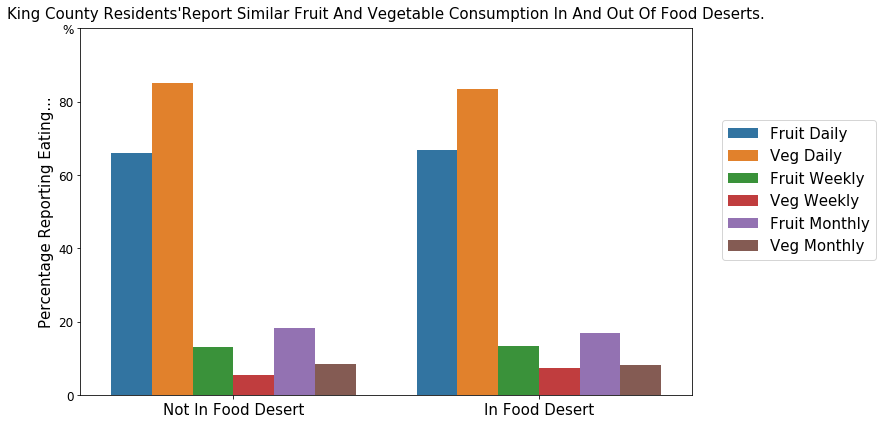

In [283]:
# Plot what's in the dataframe we just made.
fig = plt.figure(figsize=(12, 6), dpi=1200)
ax = fig.gca()
sns.barplot('In Food Desert',
            'Proportion reporting eating...',
            hue='variable',
            data=df15_consumption,
            ci=None,
            ax=ax)
plt.legend(bbox_to_anchor=(1.05, .75),
           loc=2,
           borderaxespad=0.,
           fontsize=15)
plt.title('King County Residents\'Report Similar Fruit And Vegetable Consumption In And Out Of Food Deserts.',
          fontsize=15,
          pad=10)
ax.set_xticklabels(['Not In Food Desert', 'In Food Desert'],
                   fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Percentage Reporting Eating...',
              fontsize=15)
ax.set_ylim(0, 1)
ax.set_yticklabels(['0', '20', '40', '60', '80', '%'],
                   fontsize=12)
plt.tight_layout()
plt.savefig('plots/consumption.jpg', dpi=1200, optimize=True, quality=95)
;

## Most eat fruits and vegetables every day. That's great news! 

### So, like, what's the deal with this food desert thing anyway? I mean, I wouldn't nessecarily think that over 80% of people in food deserts would eat vegetables every day. It doesn't seem to make much of a difference. Is this food desert thing even a thing? In short, yes. If you need further convincing please check out the links at the top. King County isn't typical in many ways. Two obvious differences are those median income and cost of living stats, yikes. Another factor not in our data is that public transportation is extensive throughout the area and available door to door for many vulnerable populations. Online ordering and door to door delivery services are also abundant, as are farmer's markets. Also, biking and walking and are encouraged with infrastructure improvements and public outreach. 

### Access to affordable, healthy food options remains a challenge in many communities. Thankfully, getting fruits and vegetables in King County isn't too hard, even if you're over a mile from the store and live in a lower income neighborhood. 

### It would be interesting to do simillar research in other communities around the country and see just how right I am in my assumption that the USDA is right about food deserts being generally distinctive from their surrounding food oases.